<a href="https://colab.research.google.com/github/artanebibi/datascience/blob/main/Model_Testing_OneHot_vs_Ordinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge

In [3]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/artanebibi/Datasets/refs/heads/main/Housing.csv"
)

In [4]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [5]:
# furnishingstatus will be ordinaly encoded either way it has an order!
encoder_for_furnishing_status = OrdinalEncoder()
df['furnishingstatus'] = encoder_for_furnishing_status.fit_transform(df[['furnishingstatus']])

In [6]:
df_onehot = df.copy()

# Data Encoding - Ordinal Encoder

In [7]:
encoder = OrdinalEncoder()
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[columns] = encoder.fit_transform(df[columns])

In [8]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1.0,0.0,0.0,0.0,1.0,2,1.0,0.0
1,12250000,8960,4,4,4,1.0,0.0,0.0,0.0,1.0,3,0.0,0.0
2,12250000,9960,3,2,2,1.0,0.0,1.0,0.0,0.0,2,1.0,1.0
3,12215000,7500,4,2,2,1.0,0.0,1.0,0.0,1.0,3,1.0,0.0
4,11410000,7420,4,1,2,1.0,1.0,1.0,0.0,1.0,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1.0,0.0,1.0,0.0,0.0,2,0.0,2.0
541,1767150,2400,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0
542,1750000,3620,2,1,1,1.0,0.0,0.0,0.0,0.0,0,0.0,2.0
543,1750000,2910,3,1,1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [9]:
model = LinearRegression()
x, y = df.drop(columns = 'price'), df['price']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [10]:
model.fit(testX, testY)

LinearRegression()

In [11]:
pred_y = model.predict(testX)

In [12]:
print(r2_score(testY, pred_y))

0.6961220150051954


# Data Encoding - OneHot

In [13]:
df_onehot

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,0.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,0.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,1.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,0.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,2.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,1.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,2.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,0.0


In [14]:
df_onehot = pd.get_dummies(df_onehot, columns = columns)

In [15]:
df_onehot = df_onehot.replace(False, 0).replace(True, 1)

<ipython-input-15-8ed94653e2e6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_onehot = df_onehot.replace(False, 0).replace(True, 1)


In [16]:
model_onehot = LinearRegression()
x, y = df_onehot.drop(columns = 'price'), df_onehot['price']
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [17]:
model_onehot.fit(testX, testY)

LinearRegression()

In [18]:
pred_y = model_onehot.predict(testX)

In [19]:
print(r2_score(testY, pred_y))

0.6961220150051954


# Model testing

In [20]:
poly = PolynomialFeatures(2)

trainX_poly = poly.fit_transform(trainX)
testX_poly = poly.transform(testX)

In [21]:
model.fit(trainX_poly, trainY)
pred_y = model.predict(testX_poly)
print(r2_score(testY, pred_y))
# doesnt change it!

0.6329089671488364


In [22]:
ridge = Ridge(alpha = 0.2, )
ridge.fit(trainX, trainY)
print(r2_score(testY, ridge.predict(testX)))

0.6183731424874873


In [23]:
lasso = Lasso()
lasso.fit(trainX_poly, trainY)
print(r2_score(testY, lasso.predict(testX_poly)))

0.6330214664122243


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+14, tolerance: 1.445e+11
  model = cd_fast.enet_coordinate_descent(


In [24]:
dt = DecisionTreeRegressor(max_depth=3,min_samples_leaf=5,max_leaf_nodes=10,min_samples_split=5)
dt.fit(trainX_poly, trainY)
print(r2_score(testY, dt.predict(testX_poly)))

0.4621421021257901


In [25]:
kr = KernelRidge(alpha = 0.04)
kr.fit(trainX_poly, trainY)
print(r2_score(testY, kr.predict(testX_poly)))

0.6438216651067868


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


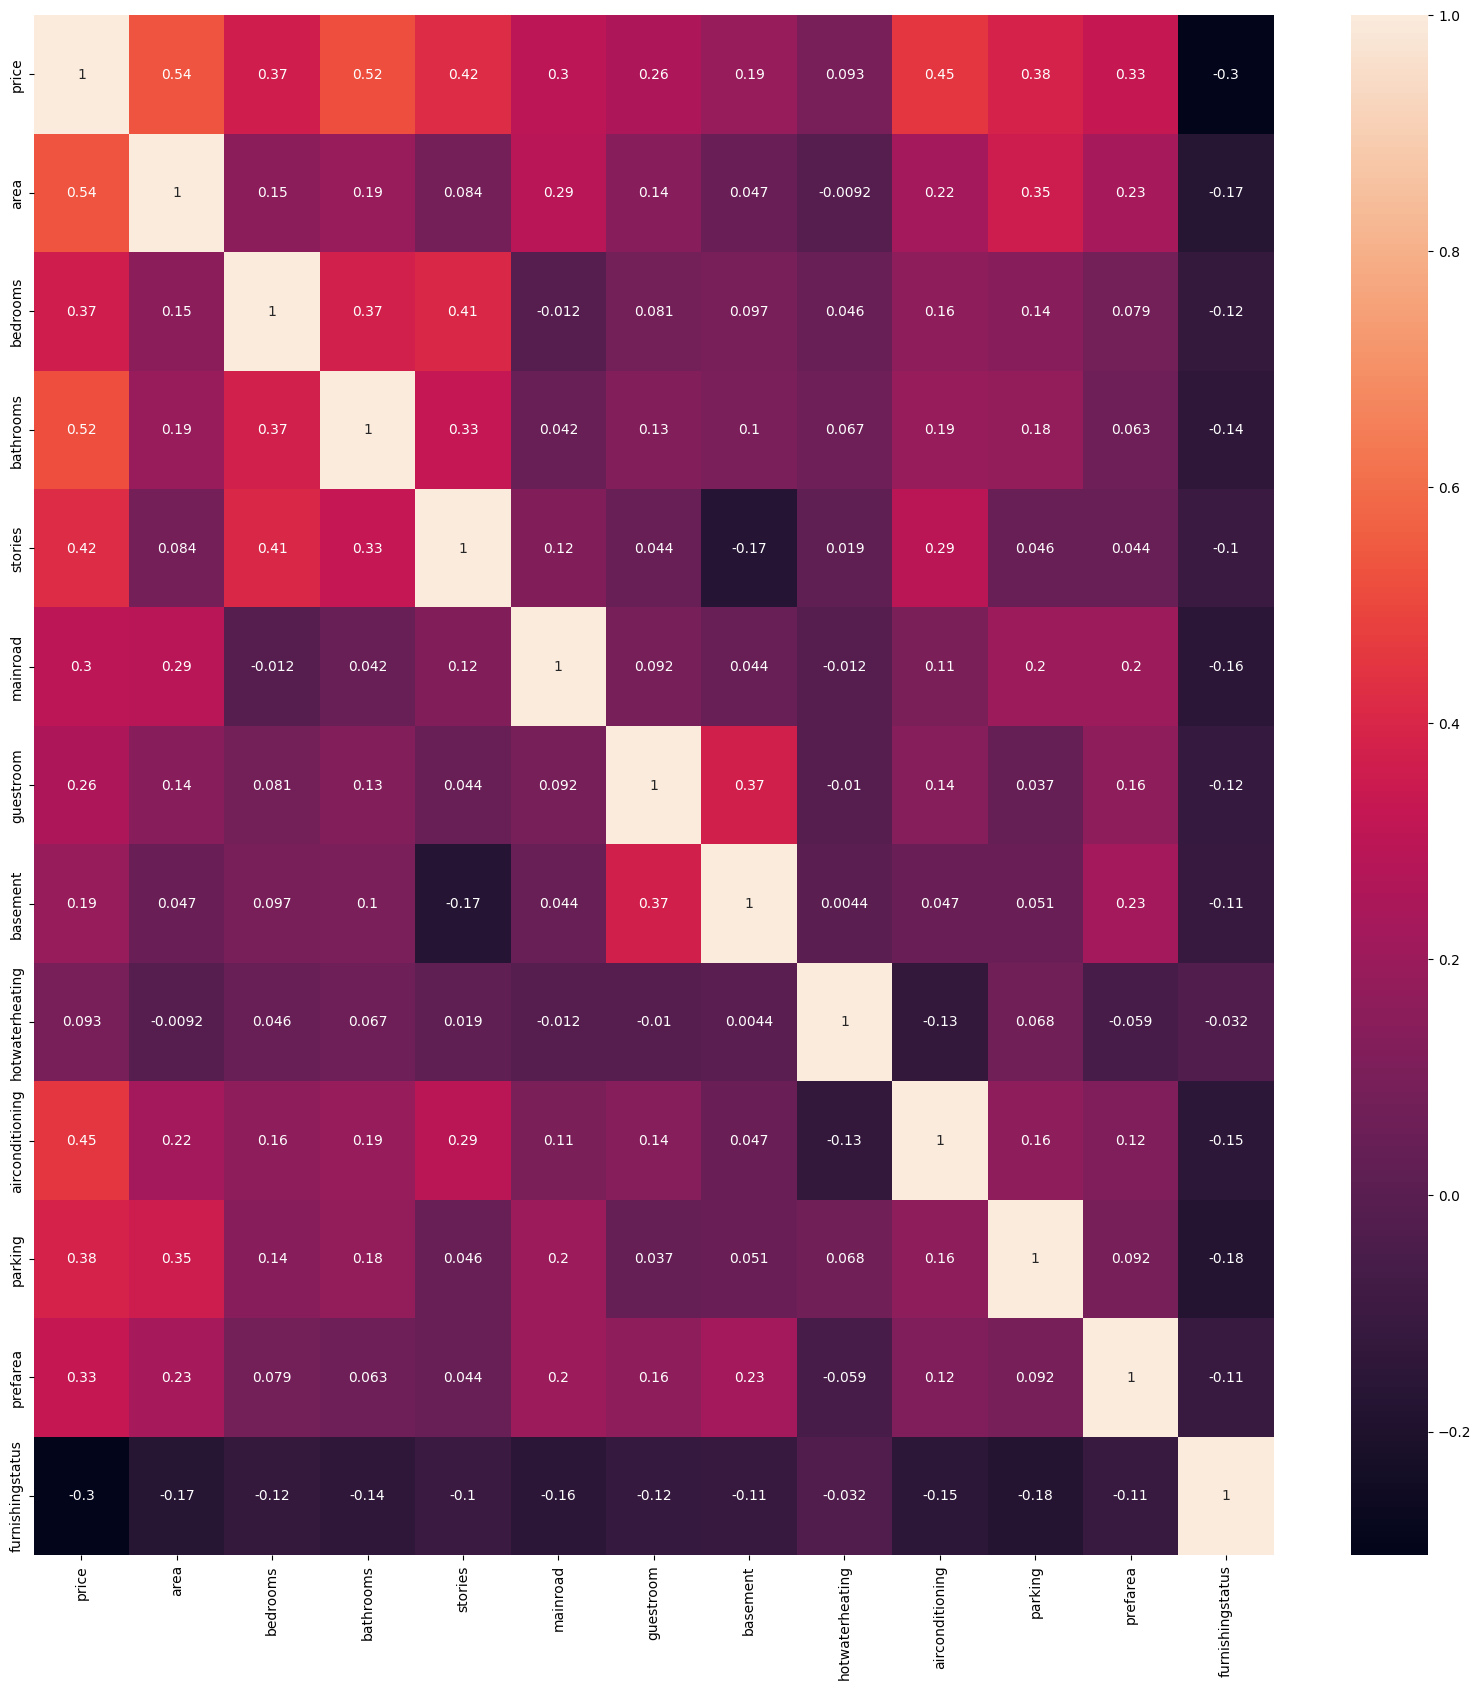

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [27]:
features = list()
for f in df.columns:
  if f not in ['guest_room', 'basement', 'hotwaterheating']:
    features.append(f)

selected_df = df[features]



<Axes: >

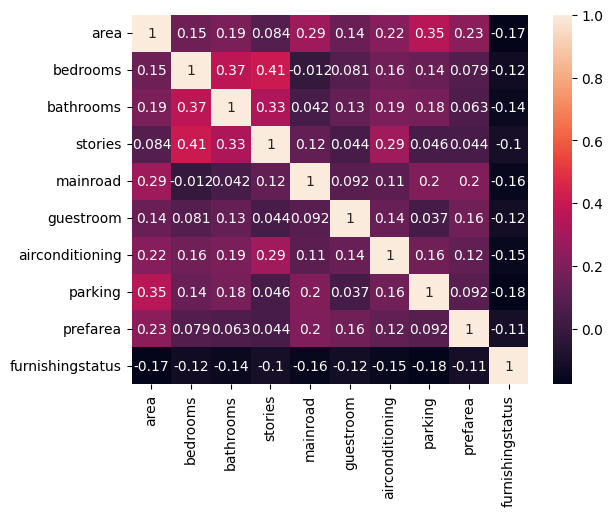

In [46]:
sns.heatmap(df[features].drop(columns = 'price').corr(), annot = True)

In [44]:
xS, yS = selected_df.drop(columns = 'price'), selected_df['price']
trainXs, testXs, trainYs, testYs = train_test_split(xS, yS, test_size = 0.2, random_state = 1)
linearR = KernelRidge(alpha = 0.09)
linearR.fit(poly.fit_transform(trainXs), trainYs)
print(r2_score(testYs, linearR.predict(poly.fit_transform(testXs))))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


0.6737224375570217
